# Bayesian_classifier_Iris

A Bayes classifier is based on *Bayes theorem* that uses prior knowledge and some assumptions on the distribution to predict a posterior probability of an event or class in this case. Bayes Classififier is very simple and easier to calculate, which is why it is a very popular classifier in machine learning.

Contents
- Upload Library's and dataset
- Encode label column
- Split dataset into train/test sets
- Split training set into seperate class's
- Calculate Gaussian probability for each class
- Create A bayesian classifier
- test on unseen data
- Evaluate results

### Library's

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import sqrt
from math import pi
from math import exp

import sklearn
from sklearn.model_selection import train_test_split

### Upload Iris dataset
Upload Iris dataset from Kaggle.com. Drop Id column

In [92]:
# Load csv file 
all_df = pd.read_csv('./Iris.csv', index_col=False)

# drop ID column
all_df.drop('Id',axis=1,inplace=True)
all_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Encode label column

In [93]:
all_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [94]:
# Assign features to X
X = all_df

# transform Species into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Species']= le.fit_transform(X['Species'])

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Split dataset into training and testing set
The dataset has a total of 150 entries, which is not alot. If we only test our classifier on say 10 entries it will look like we are getting 100% accuracy so the more you can test the better, however, we still need enough to get a good idea of the real distribution. so the dataset has been split 105:45

In [95]:
X_train, X_test = train_test_split(X, test_size=0.30, random_state=1)
X_train['Species'].value_counts()

2    37
0    36
1    32
Name: Species, dtype: int64

### Split dataset by Class
spli data set by class and return numpy array so statistics can be performed on the set.

In [96]:
def class_split(dataset):
    classes = {}
    by_class = dataset.groupby('Species')
    #by_class.head()

    for groups, data in by_class:
        classes[groups] = data
    return pd.DataFrame(classes[0]).to_numpy(), pd.DataFrame(classes[1]).to_numpy(), pd.DataFrame(classes[2]).to_numpy()

In [97]:
X_train = class_split(X_train)
#X_train

### Create Gaussian Distribution Function
We assume the distribution take the form of a guassian distribution, which makes calculations alot easier. All we need is to calculate is the mean $\mu$ and the standard deviation $\sigma$ of each column.
$$P(x)=\frac{1}{\sigma \sqrt 2 \pi } e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

In [ ]:
# Calculates the mean of each column
def mu(col):
    return sum(col)/float(len(col))

In [99]:
# Calculates the standard deviation of each column
def stdev(col):
    avg = mu(col)
    variance = sum([(x-avg)**2 for x in col]) / float(len(col)-1)
    return sqrt(variance)

In [100]:
# aggregates and calculates mean and standard deviation from each column
def dispersions(dataset):
    stats = [(mu(column), stdev(column)) for column in zip(*dataset)]
    del(stats[-1])
    return stats

In [ ]:
# puts everything together
stats =[]
for i in range(len(X_train)):
    stats.append(dispersions(X_train[i]))
stats

In [ ]:
#  creates gaussian p.d.f
def gauss_pdf(x, mean, stdev):
    return (1 / (sqrt(2 * pi) * stdev))* exp(-((x-mean)**2 / (2 * stdev**2 )))

## Bayesian classifier

$$p(\mathbf{w}|D)=\frac{p(D|\mathbf{w})p(\mathbf{w})}{p(D)}$$
We can ignore the denominator $p(D)$ or the evidence as this is only used to stablise the formaula

$$ \text{ posterior }\propto \text{ likelihood }\times \text{ prior }$$

In [104]:
# Turns df into a numpy array so calculations can be performed
X_test = X_test.to_numpy()
X_test

array([[5.8, 4. , 1.2, 0.2, 0. ],
       [5.1, 2.5, 3. , 1.1, 1. ],
       [6.6, 3. , 4.4, 1.4, 1. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [7.9, 3.8, 6.4, 2. , 2. ],
       [6.3, 3.3, 4.7, 1.6, 1. ],
       [6.9, 3.1, 5.1, 2.3, 2. ],
       [5.1, 3.8, 1.9, 0.4, 0. ],
       [4.7, 3.2, 1.6, 0.2, 0. ],
       [6.9, 3.2, 5.7, 2.3, 2. ],
       [5.6, 2.7, 4.2, 1.3, 1. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [7.1, 3. , 5.9, 2.1, 2. ],
       [6.4, 3.2, 4.5, 1.5, 1. ],
       [6. , 2.9, 4.5, 1.5, 1. ],
       [4.4, 3.2, 1.3, 0.2, 0. ],
       [5.8, 2.6, 4. , 1.2, 1. ],
       [5.6, 3. , 4.5, 1.5, 1. ],
       [5.4, 3.4, 1.5, 0.4, 0. ],
       [5. , 3.2, 1.2, 0.2, 0. ],
       [5.5, 2.6, 4.4, 1.2, 1. ],
       [5.4, 3. , 4.5, 1.5, 1. ],
       [6.7, 3. , 5. , 1.7, 1. ],
       [5. , 3.5, 1.3, 0.3, 0. ],
       [7.2, 3.2, 6. , 1.8, 2. ],
       [5.7, 2.8, 4.1, 1.3, 1. ],
       [5.5, 4.2, 1.4, 0.2, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [6.1, 2.8, 4.7, 1.2, 1. ],
       [6.3, 2

In [127]:
# Calculates the bayes classifier on each piece of data in the test set. 
def bayes_classifier(X, stats):
    likelihood =[]
    for i in range(len(stats)):
        prior=1 # p(w) - Prior
        for j in range(len(X)-1):
            prior*= gauss_pdf(X[j], stats[i][j][0],stats[i][j][1])
        likelihood.append(likelihood)
    return likelihood
        
    

In [122]:
# Uses Maximum a posterior (MAP) to select the returned index with biggest probability of tha data point being from that class.
def predict(X_test, stats):
    predict =[]
    for x in range(len(X_test)):
        pb = bayes_classifier(X_test[x], stats)
        result = pb.index(max(pb))
        predict.append(result)
    return predict

predicted = predict(X_test, stats)

In [123]:
# labels
actual = []
for i in range(len(X_test)):
    actual.append(int(X_test[i][4]))
#actual

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



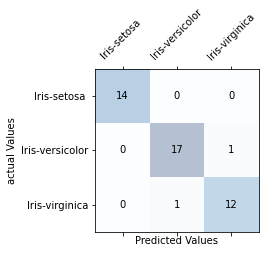

In [116]:
# Evaluate results
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(actual, results)
#print(matrix)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
classes=["Iris-setosa ", "Iris-versicolor", "Iris-virginica"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values',)
plt.ylabel('actual Values',);
print(classification_report(actual, results))

# Conclusion
A very simple classifier with very good results on even a small dataset, this method could also be improved by using cross-validation. 